# **9. Data Visualization (with Pandas)**

## **10. Subplots & Layouts**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## ✅ 1. What It Does and When to Use

### ✅ What It Does:

**Subplots** allow you to plot multiple graphs (time series, histograms, KDEs, etc.) within a **single figure**, organized into a **grid layout** (rows × columns).
It improves **comparison**, **visual organization**, and **clarity** when analyzing multiple time-based features or periods.

> 🔍 Think of subplots as a dashboard of mini-plots sharing space for cohesive analysis.

### ✅ When to Use:

* To **compare multiple time series** (e.g., temp, humidity over time).
* To split plots by **categories** (e.g., weekday/weekend, months).
* To create a **summary layout** of different types of plots (e.g., line + KDE + histogram).

## 🧩 2. Syntax and Core Parameters

### 🔹 Using `df.plot(subplots=True)` in pandas

```python
df.plot(subplots=True, layout=(rows, cols), figsize=(width, height), sharex=True)
```

| Parameter                 | Description                         |
| ------------------------- | ----------------------------------- |
| `subplots=True`           | Enables subplot mode                |
| `layout=(r, c)`           | Tuple defining row × column grid    |
| `figsize=(w, h)`          | Size of the entire figure           |
| `sharex`, `sharey`        | Share the same x/y axes among plots |
| `title`, `grid`, `legend` | Common plot controls                |

### 🔹 Using `matplotlib` for more control:

```python
fig, axs = plt.subplots(nrows, ncols, figsize=(w, h))
axs[0].plot(...)
axs[1].bar(...)
```


## 🔀 3. Techniques with Variations

| Technique               | Description                                        |
| ----------------------- | -------------------------------------------------- |
| **Basic subplots**      | Plot each column in a separate panel               |
| **Custom layout**       | Arrange plots in multi-row/multi-column format     |
| **Mixed plot types**    | Combine line, bar, KDE, etc.                       |
| **Group-wise subplots** | Create subplot per time group (month, day, etc.)   |
| **Overlay + subplot**   | Use subplot only for selected variables or windows |


## 🧪 4. Understanding Each Technique with Examples

In [2]:
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=100, freq='D')

df = pd.DataFrame({
    'timestamp': dates,
    'temperature': np.random.normal(25, 3, 100),
    'humidity': np.random.normal(60, 10, 100),
    'wind_speed': np.random.normal(10, 2, 100)
})
df.set_index('timestamp', inplace=True)

df

,temperature,humidity,wind_speed
timestamp,,,
2023-01-01,26.490142,45.846293,10.715575
2023-01-02,24.585207,55.793547,11.121569
2023-01-03,26.943066,56.572855,12.166102
2023-01-04,29.569090,51.977227,12.107604
2023-01-05,24.297540,58.387143,7.244661
...,...,...,...
2023-04-06,20.609455,63.853174,8.614181
2023-04-07,25.888361,51.161426,11.799200
2023-04-08,25.783166,61.537251,10.614599


### 1️⃣ Basic Subplots for All Columns

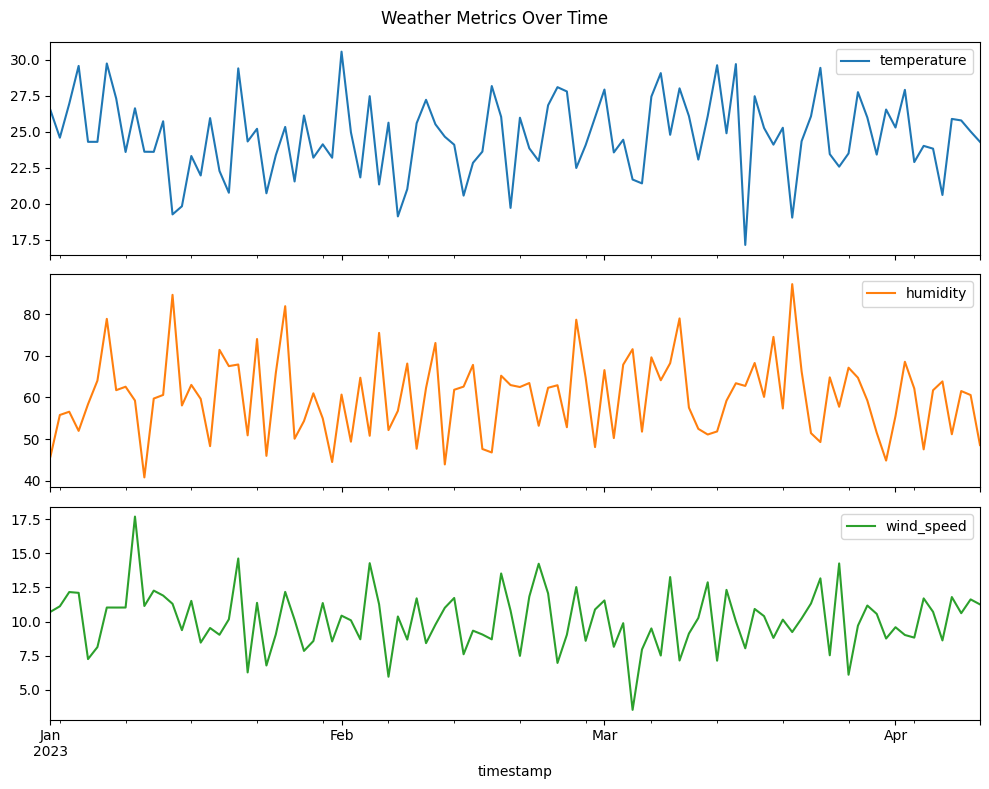

In [3]:
df.plot(subplots=True, figsize=(10, 8), title='Weather Metrics Over Time')
plt.tight_layout()
plt.show()

> Plots each metric (temperature, humidity, wind\_speed) in separate stacked panels.

### 2️⃣ Custom Layout (2 rows, 2 columns)

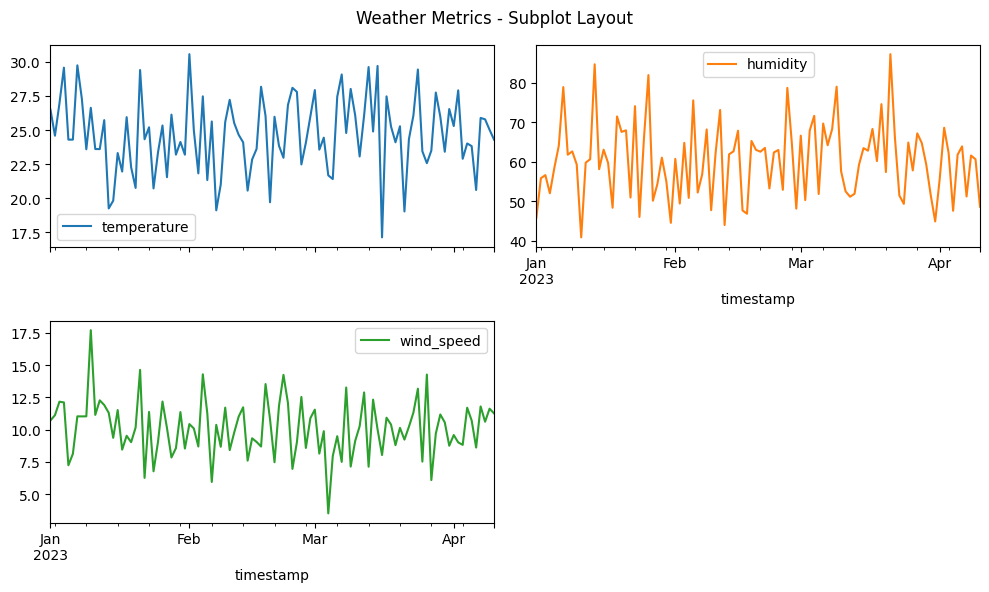

In [4]:
df.plot(subplots=True, layout=(2, 2), figsize=(10, 6), sharex=True)
plt.suptitle("Weather Metrics - Subplot Layout")
plt.tight_layout()
plt.show()

> Arranges the plots in a 2x2 grid for a dashboard-like view.

### 3️⃣ Mixed Plot Types Using Matplotlib Subplots

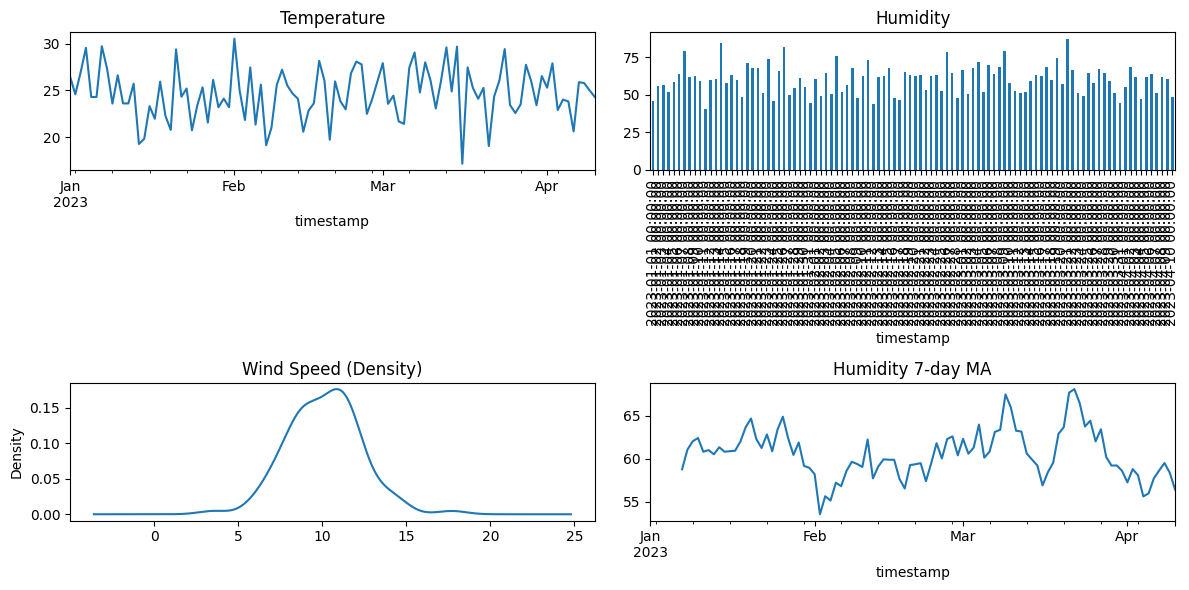

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

df['temperature'].plot(ax=axs[0, 0], title='Temperature')
df['humidity'].plot(kind='bar', ax=axs[0, 1], title='Humidity')
df['wind_speed'].plot(kind='kde', ax=axs[1, 0], title='Wind Speed (Density)')
df['humidity'].rolling(7).mean().plot(ax=axs[1, 1], title='Humidity 7-day MA')

plt.tight_layout()
plt.show()

> Demonstrates combining line, bar, KDE, and rolling average views.

### 4️⃣ Group-wise Subplots (Month-wise Temperature)

In [12]:
df.index.month
enumerate(grouped)

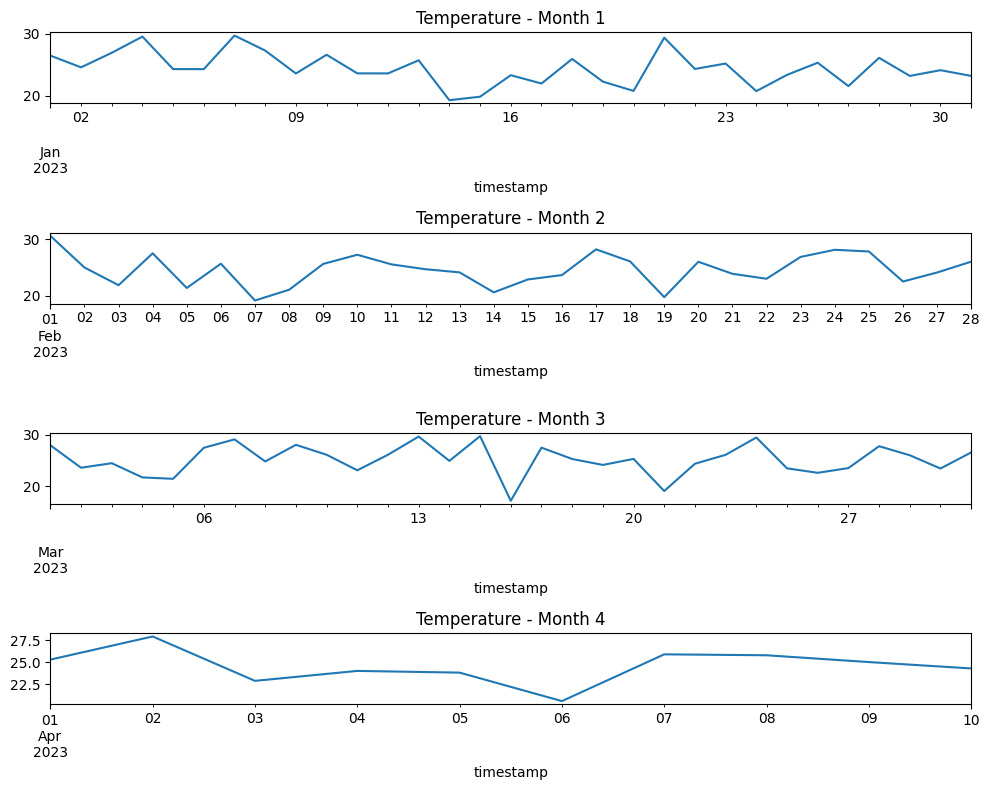

In [16]:
df['month'] = df.index.month
grouped = df.groupby('month')

fig, axs = plt.subplots(4, 1, figsize=(10, 8))
for i, (month, data) in enumerate(grouped):
    data['temperature'].plot(ax=axs[i], title=f'Temperature - Month {month}')
plt.tight_layout()
plt.show()

> Great for monthly or seasonal comparisons.

## ⚠️ 5. Common Pitfalls

| Pitfall                           | What Happens                                                   |
| --------------------------------- | -------------------------------------------------------------- |
| ❌ Not enough layout space         | Can lead to IndexError or overlapping plots                    |
| ❌ Forgetting `tight_layout()`     | Causes overlapping labels and messy plots                      |
| ❌ Not sharing axes when needed    | Makes visual comparison harder                                 |
| ❌ Too many subplots in one figure | Reduces readability; better to split into multiple figures     |
| ❌ Inconsistent plot types         | Line + bar on same subplot can confuse viewers without clarity |


## 🌍 6. Real-World Examples & Use Cases

| Scenario                   | Description                                                       |
| -------------------------- | ----------------------------------------------------------------- |
| **Energy Dashboard**       | Subplots of temperature, solar power, and battery usage           |
| **Website Metrics**        | Subplots for daily visitors, bounce rate, and average time        |
| **Sales Performance**      | Region-wise subplots showing revenue trends                       |
| **IoT Monitoring**         | Separate panels for humidity, temperature, and pressure over time |
| **Log File Visualization** | Subplots for error count, memory usage, and latency by day        |


### ✅ Summary

* **Subplots** are essential for multi-variable **comparative visualization**.
* Helps organize multiple time-based trends clearly.
* Can be combined with **grouping**, **rolling**, or **custom layouts**.
* Works well for real-time dashboards and temporal reporting tools.


<center><b>Thanks</b></center>